In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

%load_ext autoreload
%autoreload 2
import plotter

In [20]:
training_dir = '../../clust/results_wp/training_wp_nonolap'
r, val = np.loadtxt(f'{training_dir}/wp_cosmo_0_HOD_0_test_0.dat', delimiter=',', unpack=True)

training_dir = '../../clust/results_wp/training_wp_nonolap'
r2, val2 = np.loadtxt(f'{training_dir}/wp_cosmo_16_HOD_1626_test_0.dat', delimiter=',', unpack=True)

rs = [r, r2]
vals = [val, val2]

In [21]:
print(rs)
print(vals)

[array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953]), array([ 0.141235,  0.281727,  0.561971,  1.120984,  2.236068,  4.460367,
        8.897257, 17.747683, 35.401953])]
[array([5.118165e+03, 2.125562e+03, 7.001919e+02, 1.737314e+02,
       9.358893e+01, 5.470286e+01, 3.020630e+01, 1.364349e+01,
       4.631059e+00]), array([4198.843   , 2092.623   ,  872.3209  ,  280.3502  ,  119.3359  ,
         67.07319 ,   36.63981 ,   17.34823 ,    6.119862])]


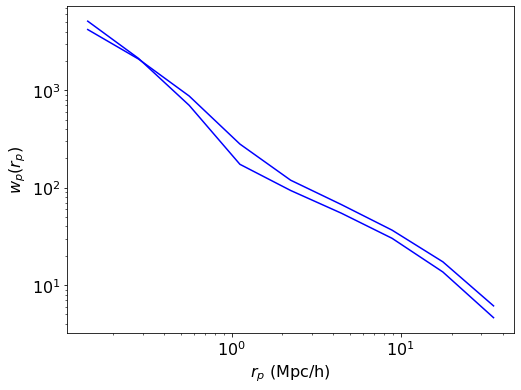

In [23]:
plotter.plot_wp_simple(rs, vals)

In [7]:
def plot_training(statistic, res_dir, data_dir, errtag='', subsample=None, version=None, nbins=9, test=False):
    plt.figure(figsize=(10,8)) 
    ps = []

    CC = range(0, 40)
    #CC = range(0,1)
    #HH = np.loadtxt("../CMASS/Gaussian_Process/GP/HOD_random_subsample_{}_version_{}.dat".format(subsample, version))
    #HH = np.atleast_2d(HH[0][:3])
    nhodnonolap = 100
    nhodpercosmo = 50
    #nhodpercosmo = 1
    HH = np.array(range(0,len(CC)*nhodnonolap))
    HH  = HH.reshape(len(CC), nhodnonolap)
    HH = HH[:,0:nhodpercosmo]
    
    if errtag:
        GP_error = np.loadtxt(f"{res_dir}/{statistic}_error{errtag}.dat")
    
    #color_idx = np.linspace(0, 1, np.max(HH)+1)
    color_idx = np.linspace(0, 1, len(CC))

    for cosmo in CC:
        HH_set = HH[cosmo]
        for hod in HH_set:
            zz = np.random.randint(len(HH.flatten()))
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[cosmo])
            if test:
                for box in range(0,5):
                    fn = '{}/{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(data_dir, statistic, cosmo, box, hod)
                    r, p = np.loadtxt(fn, delimiter=',',unpack=True)
                    if errtag:
                        plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                                     zorder=zz)
                    else:
                        plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
            else:
                fn = '{}/{}_cosmo_{}_HOD_{}_test_0.dat'.format(data_dir, statistic, cosmo, hod)
                r, p = np.loadtxt(fn, delimiter=',',unpack=True)
                if errtag:
                    plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                                 zorder=zz)
                else:
                    plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
                
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    
    if statistic == 'upf':
        plt.ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        plt.ylabel(r'$w_p$($r_p$)')
        plt.xscale('log')

In [8]:
def plot_testing(statistic, testtag, errtag='', nbins=9):
    plt.figure(figsize=(10,8)) 
    ax = plt.gca()

    CC_test = range(0, 7)
    HH_test = range(0, 10)
    #HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  

    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    color_idx = np.linspace(0, 1, len(HH_test))
    boxes = range(5)
    
    
    for cosmo in CC_test:
        hodcount = 0
        for hod in HH_test:
            for box in boxes:
                hod = int(hod)
                colidx = hodcount
                color=plt.cm.rainbow(color_idx[colidx])

                idtag = '{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(statistic, cosmo, box, hod)
                fnt = '{}testing_{}{}/{}'.format(res_dir, statistic, testtag, idtag)
                #fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)

                ntest, ptest = np.loadtxt(fnt, delimiter=',', unpack=True)
                if errtag:
                    plt.errorbar(ntest[:nbins], ptest[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color)
                else:
                    plt.plot(ntest[:nbins], ptest[:nbins], color=color, lw=0.5)
            hodcount += 1
                   
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    ax.legend()
    
    if statistic == 'upf':
        plt.ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        plt.ylabel(r'$w_p$($r_p$)')
        plt.xscale('log')

In [29]:
def plot_accuracy(statistic, testtag, acctag, hod=None, subsample=None, version=None, errtag=None, nbins=9, remove=None,
                 plot_wrt_mean=True):
    
    if plot_wrt_mean:
        ncols = 4
    else:
        ncols = 3
    fig, ax = plt.subplots(ncols, 1, figsize=(10,15), gridspec_kw={'height_ratios': [1]*ncols})

    CC_test = range(0, 7)
    HH_test = range(0, 10)
    if remove:
        for rval in remove:
            #HH_test.remove(rval)
            CC_test.remove(rval)
    #HH_test = np.array([0,1,2,3,4,6,7,8,9])
    #HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  
    upf_mean = np.zeros(nbins)
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    
    for cosmo in CC_test:
        for hod in HH_test:
            hod = int(hod)
            if "mean" in acctag:
                idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            else:
                idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)
            #fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)
            fnt = '{}testing_{}{}/{}.dat'.format(res_dir, statistic, testtag, idtag)


            ntest, ptest = np.loadtxt(fnt)
            upf_mean += ptest[:nbins]

    print('radii:', ntest)
    if errtag:
        print("Training error:", GP_error)
        
    upf_mean /= len(CC_test)*len(HH_test)
    #print "mean:",upf_mean    
    #color_idx = np.linspace(0, 1, len(CC_test)*len(HH_test))
    color_idx = np.linspace(0, 1, len(HH_test))

    i = 0
    fracerrs = []
    
    for cosmo in CC_test:
        colidx = 0
        for hod in HH_test:
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[colidx])
            colidx += 1
            if "mean" in acctag:
                idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            else:
                idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)
            #fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)
            fnt = '{}testing_{}{}/{}.dat'.format(res_dir, statistic, testtag, idtag)

            ntest, ptest = np.loadtxt(fnt)
            if i==0:
                ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color, label='testbox (actual)')
            else:
                ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)

            
            fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, idtag)
            npredic, ppredic = np.loadtxt(fnp, delimiter=',', unpack=True)
            #ppredic = abs(ppredic)
            if i==0:
                ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color, label='emulator prediction')
            else: 
                ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color)
            ax[0].set_ylabel(r"P$_U$(r)")
            
            idx_err = 1
            if plot_wrt_mean:
                ax[1].plot(ntest[:nbins], ptest[:nbins]/upf_mean[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
                ax[1].plot(npredic[:nbins], ppredic[:nbins]/upf_mean[:nbins], marker=None, ls='-', color=color)
                ax[1].set_ylabel(r"P$_v$/P$_{v,mean}$")
                idx_err = 2

            fracerr = (ppredic-ptest)/ptest
            # PRINT BAD
            if fracerr[8]>1:
                print(cosmo, hod)
            fracerrs.append(fracerr)
            ax[idx_err].plot(ntest[:nbins], fracerr[:nbins], color=color)
            ax[idx_err].set_ylabel(r"(P$_{emulator}$-P$_{true}$)/P$_{true}$")
            #ax1.plot(ntest, ppredic/ptest)
            i += 1

    fracerrs = np.array(fracerrs)
    
    std = np.std(fracerrs, axis=0)
    print("standard dev of fracerr:", std)
    ax[idx_err+1].semilogy(ntest[:nbins], std[:nbins], color='g', label='prediction error')
    if errtag:
        ax[idx_err+1].semilogy(ntest[:nbins], GP_error[:nbins], color='r', label='training set error')
    ax[idx_err+1].set_ylabel("fractional error")
    ax[idx_err+1].legend()
    ax[0].legend()
                 
    if statistic == 'upf':
        ax[0].set_ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        ax[0].set_ylabel(r'$w_p$($r_p$)')
        ax[0].set_xscale('log')
        ax[1].set_xscale('log')
        ax[2].set_xscale('log')
        ax[3].set_xscale('log')

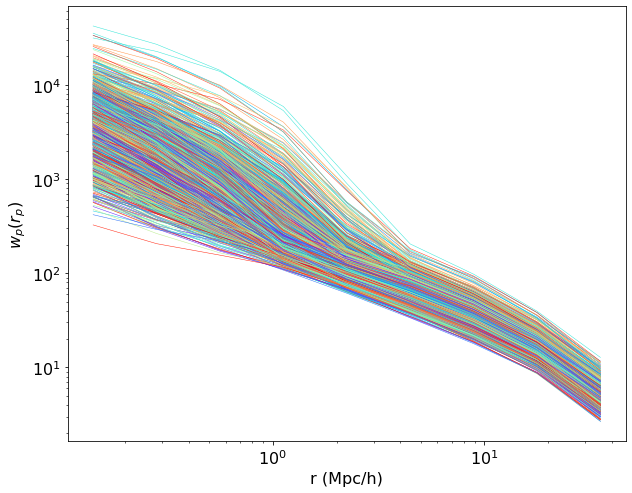

In [47]:
statistic='wp'
traintag = '_nonolap'
errtag = None
res_dir = '../../clust/results_{}'.format(statistic)
data_dir = f'{res_dir}/training_{statistic}{traintag}'
#errtag = '_10hod_test0'
plot_training(statistic, res_dir, data_dir, errtag=errtag)

No handles with labels found to put in legend.


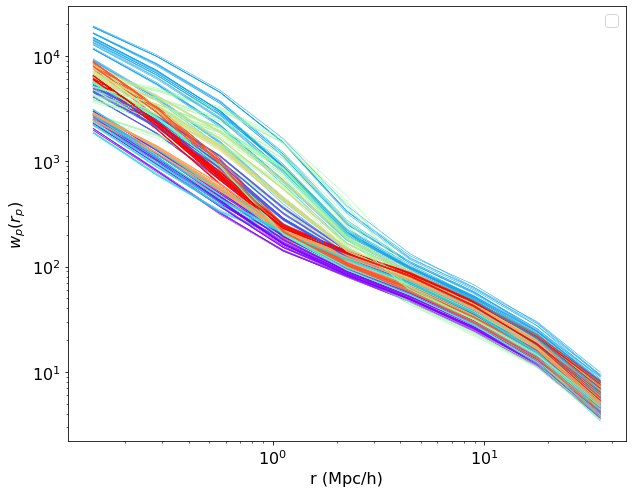

In [55]:
statistic='wp'
testtag = ''
errtag = None
#errtag = '_10hod_test0'
res_dir = '../../clust/results_{}'.format(statistic)
testtag = ''
#data_dir = f'{res_dir}/testing_{statistic}{testtag}'
plot_testing(statistic, testtag)

radii: [ 0.141235  0.281727  0.561971  1.120984  2.236068  4.460367  8.897257
 17.747683 35.401953]
Training error: [0.01204897 0.01374562 0.01758566 0.02469664 0.03051155 0.02026336
 0.0174491  0.02324893 0.05174518]
standard dev of fracerr: [0.06400344 0.07501721 0.0699034  0.06832318 0.0675095  0.04147352
 0.04732891 0.04327354 0.09945768]


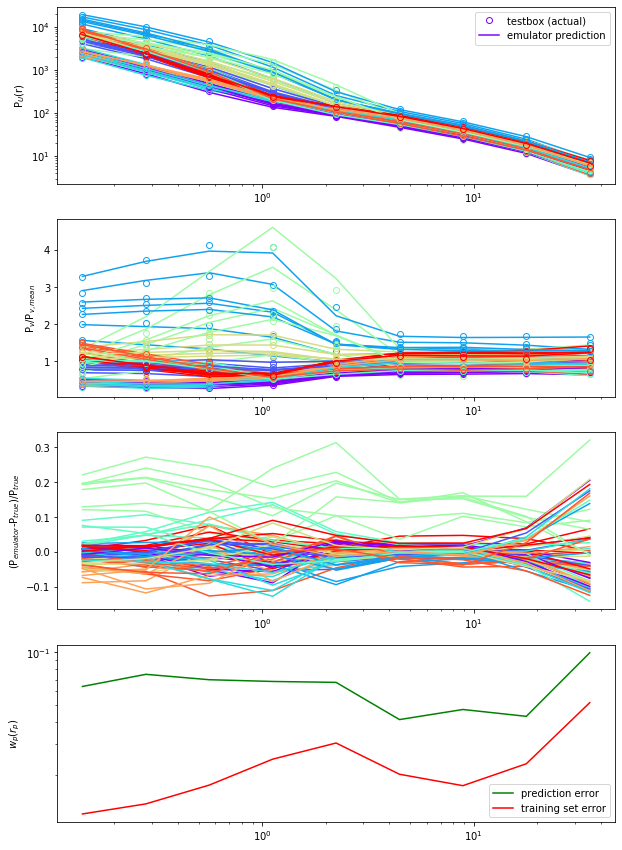

In [28]:
statistic='wp'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, testtag, acctag, errtag=errtag, nbins=9)

radii: [ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
Training error: [0.00027332 0.00138898 0.00474205 0.00854407 0.01645155 0.02912254
 0.05004355 0.1052322  0.18863659]
3 5
4 5
6 5
standard dev of fracerr: [0.00055576 0.00474411 0.01350986 0.024566   0.04288981 0.0747787
 0.11925527 0.20890595 0.3355329 ]


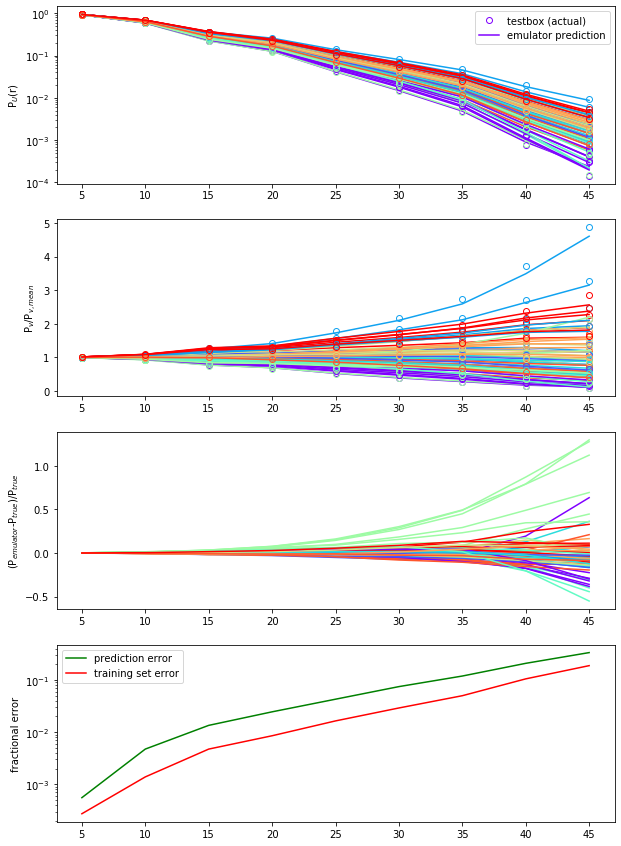

In [31]:
statistic='upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = '_emuobj'
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, testtag, acctag, errtag=errtag, nbins=9)